# Teaching AI Vision models to cry "Werewolf"
## OpenAI

- when I first started testing Vision AI capabilities, across several platforms, I ran into what has been labeled as a "known limitation" - it's difficulty in being able to spot the difference between fact and fiction for similar images
- the first generation of the prompt that could tell the difference between a wolf and a werewolf referred to sketching techniques and anatomical ratios.
- the current generation is intended for more general "initial analysis" in a multi-agent workflow, but still works well in spotting the difference between a wolf and a werewolf.
  - In terms of the ability of the current prompt to spot the difference between the wolf and werewolf I believe it is due to the "step by step" nature of the prompt.
- the last example in the Notebook focuses on what I believe is a more valuable usecase, which is medical imaging.

A great use case for LangGraph, with this prompt being used for initial analysis and specialized agents / nodes being used for detailed analysis.

## Jupyter Notebook Setup

In [1]:
%pip install --upgrade --quiet langchain_openai pillow


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### API Key setup

In [2]:
import getpass
import os

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Provide your OpenAI API Key")

#### Enable LangSmith

In [3]:
import os
import uuid, datetime

uid = uuid.uuid4().hex[:6]
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

project_name = f"openai_image_classification_{current_time}"
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]=project_name

## Image Summarization function

In [4]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI

def image_summarize(prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4o", max_tokens=1024)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": image_url},
                    },
                ]
            )
        ]
    )
    return msg.content


### Image Summarization Prompt

In [5]:
firstgen_prompt_text = """
*Begin your image analysis by following these steps:*

Initial Impression: Describe your first reaction to the image and the overall mood or emotion it conveys.
Contextual Background: If known, provide any relevant historical, cultural, or artistic context of the image.
Detailed Walkthrough: Use art analysis techniques for a detailed examination of the image, focusing on composition, symbolism, and artistic choices.
Unrealistic and Fantastical Elements: Focus on features that are unrealistic or symbolic, especially in depictions of humans, creatures, or environments. Discuss how they differ from real-life counterparts and their potential meanings.

*Conclude your analysis with:*

- Overall Interpretation: Summarize your comprehensive understanding of the image, integrating the various elements you have analyzed.
"""

In [6]:
analysis_prompt_text = """
**Objective:** Analyze the image to categorize it and provide a standardized JSON output that includes a comprehensive summary of the initial analysis, ensuring consistency and conciseness for downstream processing.

**Process:**

1. **Visual Inspection:**
   - Summarize the primary visual content, noting prominent features such as objects, scenes, figures, or text.
2. **Contextual Clues:**
   - Note any context-specific elements indicating the image's purpose or origin.
3. **Image Type Identification:**
   - Classify the image into one of the predefined categories: `Artwork`, `Real-life Photograph`, `Business-related`, `Medical`, `Other`.
4. **Intended Audience:**
   - Speculate on the intended audience based on content and style.
5. **Initial Interpretation:**
   - Provide a brief interpretation of the image's conveyed or represented content.
6. **Special Attention Elements:**
   - Highlight elements requiring special attention in detailed analysis.
7. **Recommendation for Specialized Analysis:**
   - Indicate if the image is recommended for further analysis by a specialized tool.

**Output Structure:**

```json
{
  "imageType": "Category",
  "visualInspectionSummary": "Summary of the primary visual content.",
  "contextualClues": "Noted context-specific elements.",
  "intendedAudience": "Speculated audience.",
  "initialInterpretation": "Brief interpretation of the image content.",
  "specialAttentionElements": "Elements needing special attention.",
  "recommendedForDetailedAnalysis": true/false,
  "additionalDetails": {
    "potentialConcerns": "Any potential concerns for detailed analysis.",
    "comparativeAnalysis": "Comparative notes if applicable."
  }
}
```

**Guidelines for Analysis:**

- Ensure all fields are included in every output, using `null` or `"N/A"` for non-applicable sections.
- Adhere to the uniform naming conventions and predefined categories.
- Provide clear, concise descriptions and summaries to facilitate easy understanding and processing by downstream systems.
- Conduct automated validation checks to confirm adherence to the standardized format before submission.
"""

## Wolf image analysis

- use LangChain and Vision models to describe the image

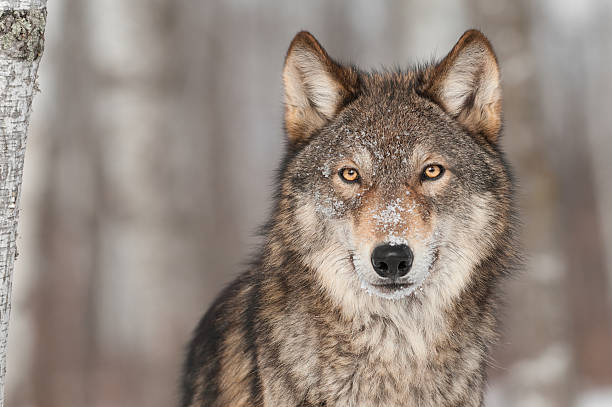

In [7]:
import requests
from IPython.display import Image

image_url = "https://media.istockphoto.com/id/177794699/photo/grey-wolf-portrait.jpg?s=612x612&w=0&k=20&c=vEUo0UKAKeCIIm35zU0zR7XDOf-4AKXvJWLZGx4BVws="

content = requests.get(image_url).content
Image(content)

### Vision Model Image Summarization code

#### Image Analysis

In [8]:
firstgen_result = image_summarize(firstgen_prompt_text)

In [9]:
print(firstgen_result)

**Initial Impression:**
My first reaction to the image is one of awe and respect. The wolf's direct gaze creates a powerful and intense connection with the viewer. The overall mood conveyed is one of majesty and wildness, underscored by the wolf's keen, almost piercing eyes that seem to communicate intelligence and awareness.

**Contextual Background:**
Wolves have been a significant symbol in various cultures throughout history. In many Native American traditions, wolves are seen as teachers and pathfinders. In European folklore, they often symbolize both danger and wilderness, sometimes representing the untamed aspects of nature. Artistically, wolves are frequently depicted to evoke a sense of mystery and primal power.

**Detailed Walkthrough:**
- **Composition:** The composition of the image is centered, with the wolf's face prominently in focus. This central framing draws immediate attention to the wolf and its expressive features.
- **Lighting:** The lighting is natural and soft, 

In [10]:
analysis_result = image_summarize(analysis_prompt_text)

In [11]:
print(analysis_result)

```json
{
  "imageType": "Real-life Photograph",
  "visualInspectionSummary": "The image depicts a close-up of a wolf with snow on its face, set against a blurred natural background.",
  "contextualClues": "The presence of snow suggests a cold, possibly winter environment. The natural background implies a wildlife setting.",
  "intendedAudience": "Nature enthusiasts, wildlife researchers, general public interested in wildlife photography.",
  "initialInterpretation": "The image captures the essence of wildlife, focusing on the natural beauty and raw presence of the wolf in its habitat.",
  "specialAttentionElements": "The detailed features of the wolf, including its fur texture and the snow on its face, require special attention for high-quality image analysis.",
  "recommendedForDetailedAnalysis": true,
  "additionalDetails": {
    "potentialConcerns": "Ensure accurate color representation and clarity for detailed features during analysis.",
    "comparativeAnalysis": "Compare with ot

#### Stable Diffusion Prompt

- create a Stable Diffusion Prompt based on the image analysis

In [12]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(f"Create a Stable Diffusion prompt to generate an image for {analysis_result}.")
print(result.content)

Sure, here's a Stable Diffusion prompt based on the information you provided:

```
A high-resolution, real-life photograph of a wolf in a natural, snowy environment. The wolf is shown in a close-up shot with snow delicately settled on its face, highlighting its detailed fur texture. The background is naturally blurred, emphasizing the wolf as the central subject. The setting indicates a cold, wintery scene, capturing the essence of wildlife in its natural habitat. This image is intended for nature enthusiasts, wildlife researchers, and the general public interested in wildlife photography. Special attention should be given to the accurate representation of the wolf's fur texture and the snow on its face, ensuring high clarity and color accuracy. The photograph should be suitable for detailed analysis and comparative studies with other wildlife images.
```


## Werewolf image analysis

- use LangChain and Vision models to describe the image

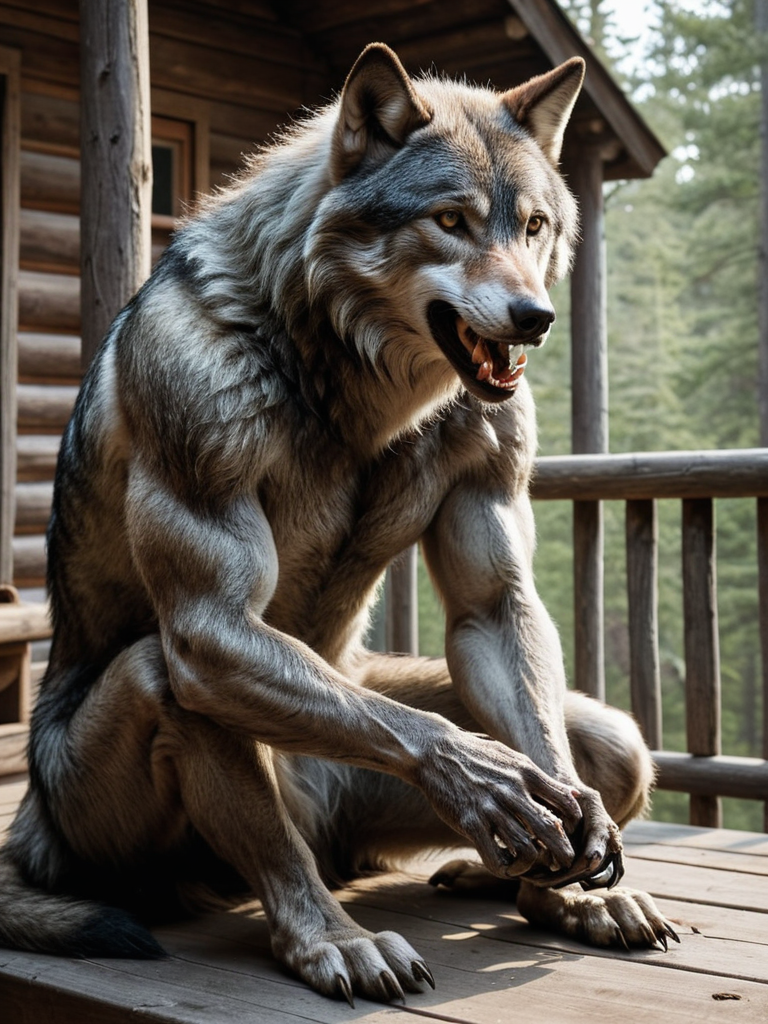

In [13]:
# current example is based on an image from the CIVITAI.com site

import requests
from IPython.display import Image

image_url = "https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/cc4245f5-588a-462e-97be-da2a4f7b210b/original=true/00093-1169062797.jpeg"

content = requests.get(image_url).content
Image(content)

### Vision Model Image Summarization code

#### Image Analysis

In [14]:
firstgen_result = image_summarize(firstgen_prompt_text)

In [15]:
print(firstgen_result)

**Initial Impression:**
The image immediately captivates with a striking and somewhat eerie atmosphere. The central figure, a humanoid wolf-like creature, evokes a sense of both power and mystery. The creature's posture and expression suggest a blend of contemplation and readiness, contributing to a mood that is intense and slightly unsettling.

**Contextual Background:**
This image appears to draw on elements from folklore, mythology, and fantasy art. The concept of a werewolf or lycanthrope—a human who can transform into a wolf—has deep roots in many cultures' mythologies. It symbolizes the duality of human nature and the primal instincts that lie beneath the surface of civilization.

**Detailed Walkthrough:**
- **Composition:** The creature is the focal point, placed centrally on what appears to be the porch of a rustic cabin. This setting adds a layer of narrative, suggesting a secluded, possibly forested location. The background includes wooden structures and greenery, enhancing t

In [16]:
analysis_result = image_summarize(analysis_prompt_text)

In [17]:
print(analysis_result)

```json
{
  "imageType": "Artwork",
  "visualInspectionSummary": "The image depicts an anthropomorphic wolf sitting on a wooden porch. The wolf has human-like muscular arms and a partially human posture, with a detailed, realistic fur texture.",
  "contextualClues": "The setting appears to be a rustic wooden cabin in a forested area, suggesting a wilderness or natural environment.",
  "intendedAudience": "The intended audience may include enthusiasts of fantasy art, mythology, or anthropomorphic characters.",
  "initialInterpretation": "The image portrays a blending of human and animal characteristics, possibly indicating themes of transformation or the merging of human and animal traits.",
  "specialAttentionElements": "The anthropomorphic nature of the wolf, the detailed fur texture, and the realistic setting.",
  "recommendedForDetailedAnalysis": false,
  "additionalDetails": {
    "potentialConcerns": "N/A",
    "comparativeAnalysis": "N/A"
  }
}
```


#### Stable Diffusion Prompt

- create a Stable Diffusion Prompt based on the image analysis

In [18]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(f"Create a Stable Diffusion prompt to generate an image for {analysis_result}.")
print(result.content)

Sure, here is a Stable Diffusion prompt based on the information provided:

**Prompt:**
A detailed artwork of an anthropomorphic wolf sitting on a rustic wooden porch of a cabin in a forest. The wolf has human-like muscular arms and a partially human posture, with a highly realistic fur texture. The setting is a natural, wilderness environment, with the cabin surrounded by dense forest. The image should blend human and animal characteristics, evoking themes of transformation or the merging of human and animal traits. Special attention should be given to the anthropomorphic nature of the wolf, the detailed fur texture, and the realistic portrayal of the setting. The intended audience includes fantasy art enthusiasts, mythology fans, and those who appreciate anthropomorphic characters.


## Medical Image Analysis

- use LangChain and Vision models to describe the image

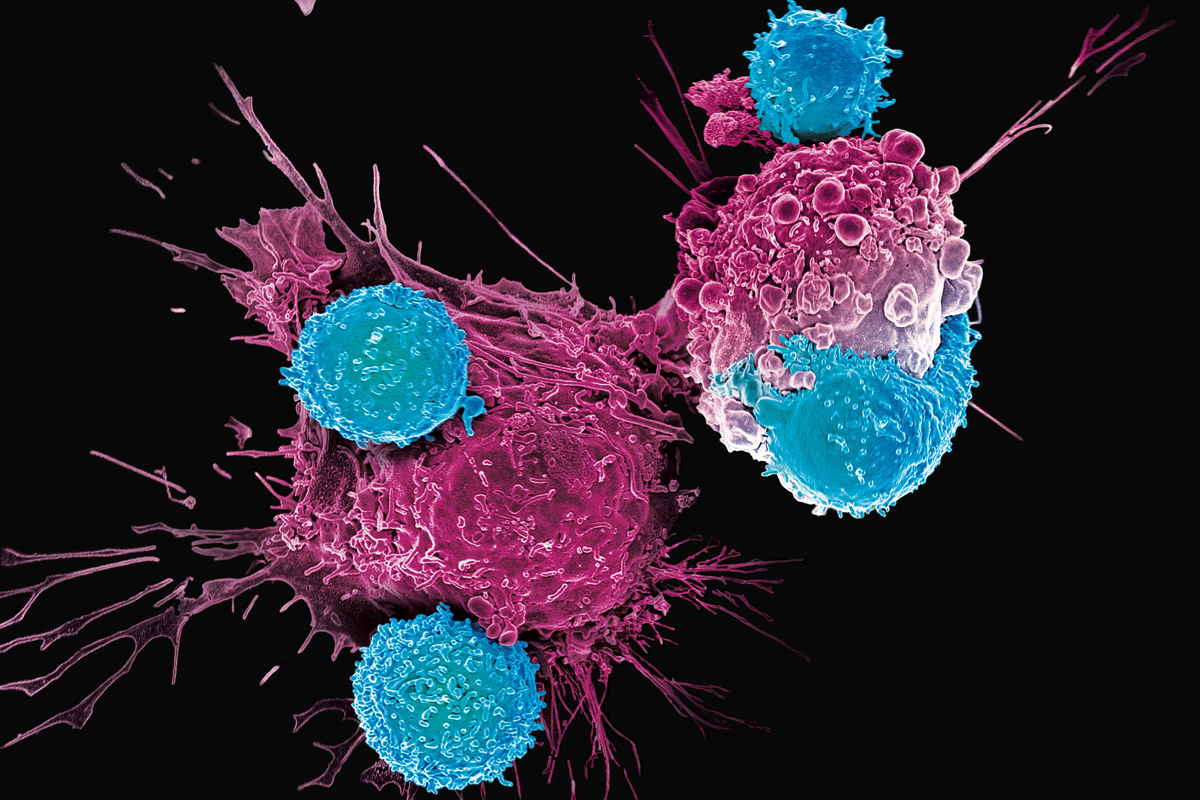

In [19]:
import requests
from IPython.display import Image

image_url = "https://www.mskcc.org/sites/default/files/paragraph/1504/image/adusumillia-car_0_3x2.jpg"

content = requests.get(image_url).content
Image(content)

### Vision Model Image Summarization code

#### Image Analysis

In [20]:
firstgen_result = image_summarize(firstgen_prompt_text)

In [21]:
print(firstgen_result)

### Initial Impression

This image evokes a sense of scientific curiosity and fascination. The vibrant contrasting colors against the black background give it a striking and almost otherworldly aesthetic, suggesting a microscopic or cellular level of detail. The overall mood is one of dynamic interaction and complexity.

### Contextual Background

This image appears to be a colored scanning electron microscope (SEM) image of cells. These types of images are used in scientific research to study the detailed structures of cells and other microscopic entities. The vivid colors are typically added to enhance contrast and highlight different components for easier visualization and understanding.

### Detailed Walkthrough

#### Composition
- **Subject Placement**: The image features what appear to be cell structures, with larger, irregularly shaped ones in pink and smaller, more spherical ones in blue. The pink cells dominate the foreground, with the blue cells interacting with them.
- **Col

In [22]:
analysis_result = image_summarize(analysis_prompt_text)

In [23]:
print(analysis_result)

```json
{
  "imageType": "Medical",
  "visualInspectionSummary": "The image shows a microscopic view of cells with a dark background. The cells are colored in vibrant shades of pink and blue.",
  "contextualClues": "The use of color and the microscopic perspective suggest a biological or medical context, likely a scientific or medical image of cells.",
  "intendedAudience": "Medical professionals, researchers, or students in the field of biology or medicine.",
  "initialInterpretation": "This image appears to be a highly magnified view of cells, possibly highlighting an interaction between different cell types or a cellular process.",
  "specialAttentionElements": "The vibrant coloring and detailed structure of the cells, which may be important for understanding the specific biological or medical context.",
  "recommendedForDetailedAnalysis": true,
  "additionalDetails": {
    "potentialConcerns": "Ensure accurate interpretation of the cellular structures and processes depicted.",
    

#### Stable Diffusion Prompt

- create a Stable Diffusion Prompt based on the image analysis

In [24]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(f"Create a Stable Diffusion prompt to generate an image for {analysis_result}.")
print(result.content)

Sure, here is a Stable Diffusion prompt based on the provided JSON:

```
Create a highly detailed, microscopic view of biological cells against a dark background. The cells should be colored in vibrant shades of pink and blue, with intricate structures that highlight their detailed morphology. The perspective should clearly convey a scientific or medical context, suitable for medical professionals, researchers, or students in the fields of biology or medicine. Emphasize the interaction between different cell types or cellular processes, ensuring that the vibrant coloring and detailed cell structures are accurately depicted for easy interpretation. This image should be suitable for detailed analysis and comparative study with other microscopic images of similar cells.
```
